In [1]:
import sys
from pathlib import Path 
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt
modulepath = Path.cwd().parent / "utils"
modulepath = str(modulepath)
projectpath = Path.cwd().parent
projectpath = str(projectpath)
if modulepath not in sys.path:
    sys.path.insert(0,str(modulepath))
if projectpath not in sys.path:
    sys.path.insert(0,str(projectpath))  
print(sys.path)


['c:\\Users\\oriol\\GitHub_Repos\\CNN-classification', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\utils', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\python312.zip', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\DLLs', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126', '', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\win32', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\Pythonwin']


In [2]:
from utils.data_loaders import create_train_test_dataloaders
transform = v2.Compose([v2.RandomCrop(size=(20, 20))])#,v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])


In [3]:
train_basic,test_basic = create_train_test_dataloaders("FashionMNIST")
train_augmented,test_augmented = create_train_test_dataloaders("FashionMNIST",transform=transform)
img_basic,label_basic = next(iter(train_basic))
img_augmented,label_augmented = next(iter(train_augmented))

(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

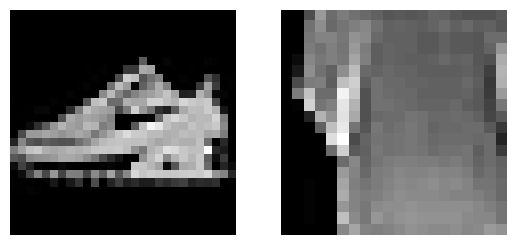

In [4]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_basic[0].permute(1,2,0),cmap="gray")
ax[1].imshow(img_augmented[0].permute(1,2,0),cmap="gray")
ax[0].axis(False)
ax[1].axis(False)

In [5]:
img_basic.shape

torch.Size([32, 1, 28, 28])

In [ ]:
from utils.model_architectures import TinyVGG_1
from torchinfo import summary 

tvgg = TinyVGG_1(1,20,10)

In [7]:
summary(tvgg,input_size=[32,1,28,28])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 10]                  --
├─Sequential: 1-1                        [32, 20, 12, 12]          --
│    └─Conv2d: 2-1                       [32, 20, 26, 26]          200
│    └─ReLU: 2-2                         [32, 20, 26, 26]          --
│    └─Conv2d: 2-3                       [32, 20, 24, 24]          3,620
│    └─ReLU: 2-4                         [32, 20, 24, 24]          --
│    └─MaxPool2d: 2-5                    [32, 20, 12, 12]          --
├─Sequential: 1-2                        [32, 20, 4, 4]            --
│    └─Conv2d: 2-6                       [32, 20, 10, 10]          3,620
│    └─ReLU: 2-7                         [32, 20, 10, 10]          --
│    └─Conv2d: 2-8                       [32, 20, 8, 8]            3,620
│    └─ReLU: 2-9                         [32, 20, 8, 8]            --
│    └─MaxPool2d: 2-10                   [32, 20, 4, 4]            --
├─Seq

In [8]:
tvgg.cpu()
tvgg.forward(img_basic[0].unsqueeze(dim=0))
torch.softmax(tvgg.forward(img_basic[0].unsqueeze(dim=0)),1)

#next(tvgg.parameters()).is_cuda #check if model on cuda

tensor([[0.1021, 0.1053, 0.1001, 0.0973, 0.1005, 0.0975, 0.1021, 0.0962, 0.0997,
         0.0992]], grad_fn=<SoftmaxBackward0>)

In [ ]:
from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from utils.config import device 
from torch import nn
from utils.helpers import create_writer
from utils.helpers import create_experiment_metadata
train_dataloader, test_dataloader = create_train_test_dataloaders()

model_0 = TinyVGG_1(input_shape=1,hidden_channels=10,output_shape=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
#print(f"Is the model on GPU {next(model_0.parameters()).is_cuda}")

model_name = model_0._get_name()
experiment_name = "Test_writer_and_dict"
NUM_EPOCHS = 2

writer,dict_dir = create_writer(experiment_name=experiment_name,model_name=model_name,extra="2 epochs")
create_experiment_metadata(experiment_name=experiment_name,train_dataloader=train_dataloader,test_dataloader=test_dataloader,model=model_0,optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS,dict_dir=dict_dir)

train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS,writer=writer)


Is the model on GPUTrue
[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\runs\2025-08-19\Test_writer\TinyVGG\1 epochs...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3796 | train_acc: 0.4862 | test_loss: 0.7336 | test_acc: 0.7147


{'train_loss': [1.3795879821300507],
 'train_acc': [0.4861666666666667],
 'test_loss': [0.7335742236897588],
 'test_acc': [0.7146565495207667]}

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 29840), started 0:10:59 ago. (Use '!kill 29840' to kill it.)

In [51]:
trn,tst = create_train_test_dataloaders("Another name",32)

In [ ]:
from datetime import datetime
print(f"The training dataset's name is '{trn.dataset.root.split("\\")[-1]}' of type {type(trn.dataset.root.split("\\")[-1])}")
print(f"The training dataset's size is {len(trn.dataset)} of type {type(len(trn.dataset))}")
print("The testing dataset...")
print(f"Batch size is {trn.__getstate__()['batch_size']} of type {type(trn.__getstate__()['batch_size'])}")
print(f"Model name is {model_0._get_name()} of type {type(model_0._get_name())}")
print(f"Optimizer is {type(optimizer).__name__} of type {type(type(optimizer).__name__)}")
print(f"Loss function is {type(loss_fn).__name__} of type {type(type(loss_fn).__name__)}")
print("Number of epochs will be given as an input to the function")
print(f"Timestamp (dd-mm-yyyy) is as simple as {datetime.now().strftime("%d-%m-%Y")}")
print("The hyperparameters of the model architecture also need to be note, like hidden channels")

#To track
    # timestamp 
    # model name
    # epochs
    # hidden channels for convolutional and hidden nodes for FC layers
    # batch size
    # optimizer
    # OPTIMIZER PARAMETERS LIKE LEARNING RATE, MOMENTUM AND ON AND ON
    # loss function 
    # train and test datasets

The training dataset's name is 'Another name' of type <class 'str'>
The training dataset's size is 60000 of type <class 'int'>
The testing dataset...
Batch size is 32 of type <class 'int'>
Model name is TinyVGG of type <class 'str'>
Optimizer is SGD of type <class 'str'>
Loss function is CrossEntropyLoss of type <class 'str'>
Number of epochs will be given as an input to the function
Timestamp (dd-mm-yyyy) is as simple as 19-08-2025
The hyperparameters of the model architecture also need to be note, like hidden channels


In [ ]:
import os
from utils.config import MAIN_DIRECTORY

dir = os.path.join(MAIN_DIRECTORY, "runs", "asdfg","runs","jklm")
idx = dir.split("\\").index("CNN-classification")


4


In [7]:
from utils.helpers import create_writer
writer,dict_dir = create_writer(experiment_name="Test_writer_and_dict",model_name="model_name",extra="2 epochs")
print(dict_dir, type(dict_dir))

[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\runs\model_name\Test_writer_and_dict\2 epochs...
c:\Users\oriol\GitHub_Repos\CNN-classification\runs_metadata\model_name\Test_writer_and_dict\2 epochs <class 'str'>


In [9]:
import os
os.path.join(dict_dir,"lolol.txt")

'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\runs_metadata\\model_name\\Test_writer_and_dict\\2 epochs\\lolol.txt'